## Three ways to evaluate the machine learning model.....
* Estiamtor score method
* Scoring parameter method
* Problem specific function method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing data...
hd = pd.read_csv("../data/heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
len(hd)

303

In [4]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


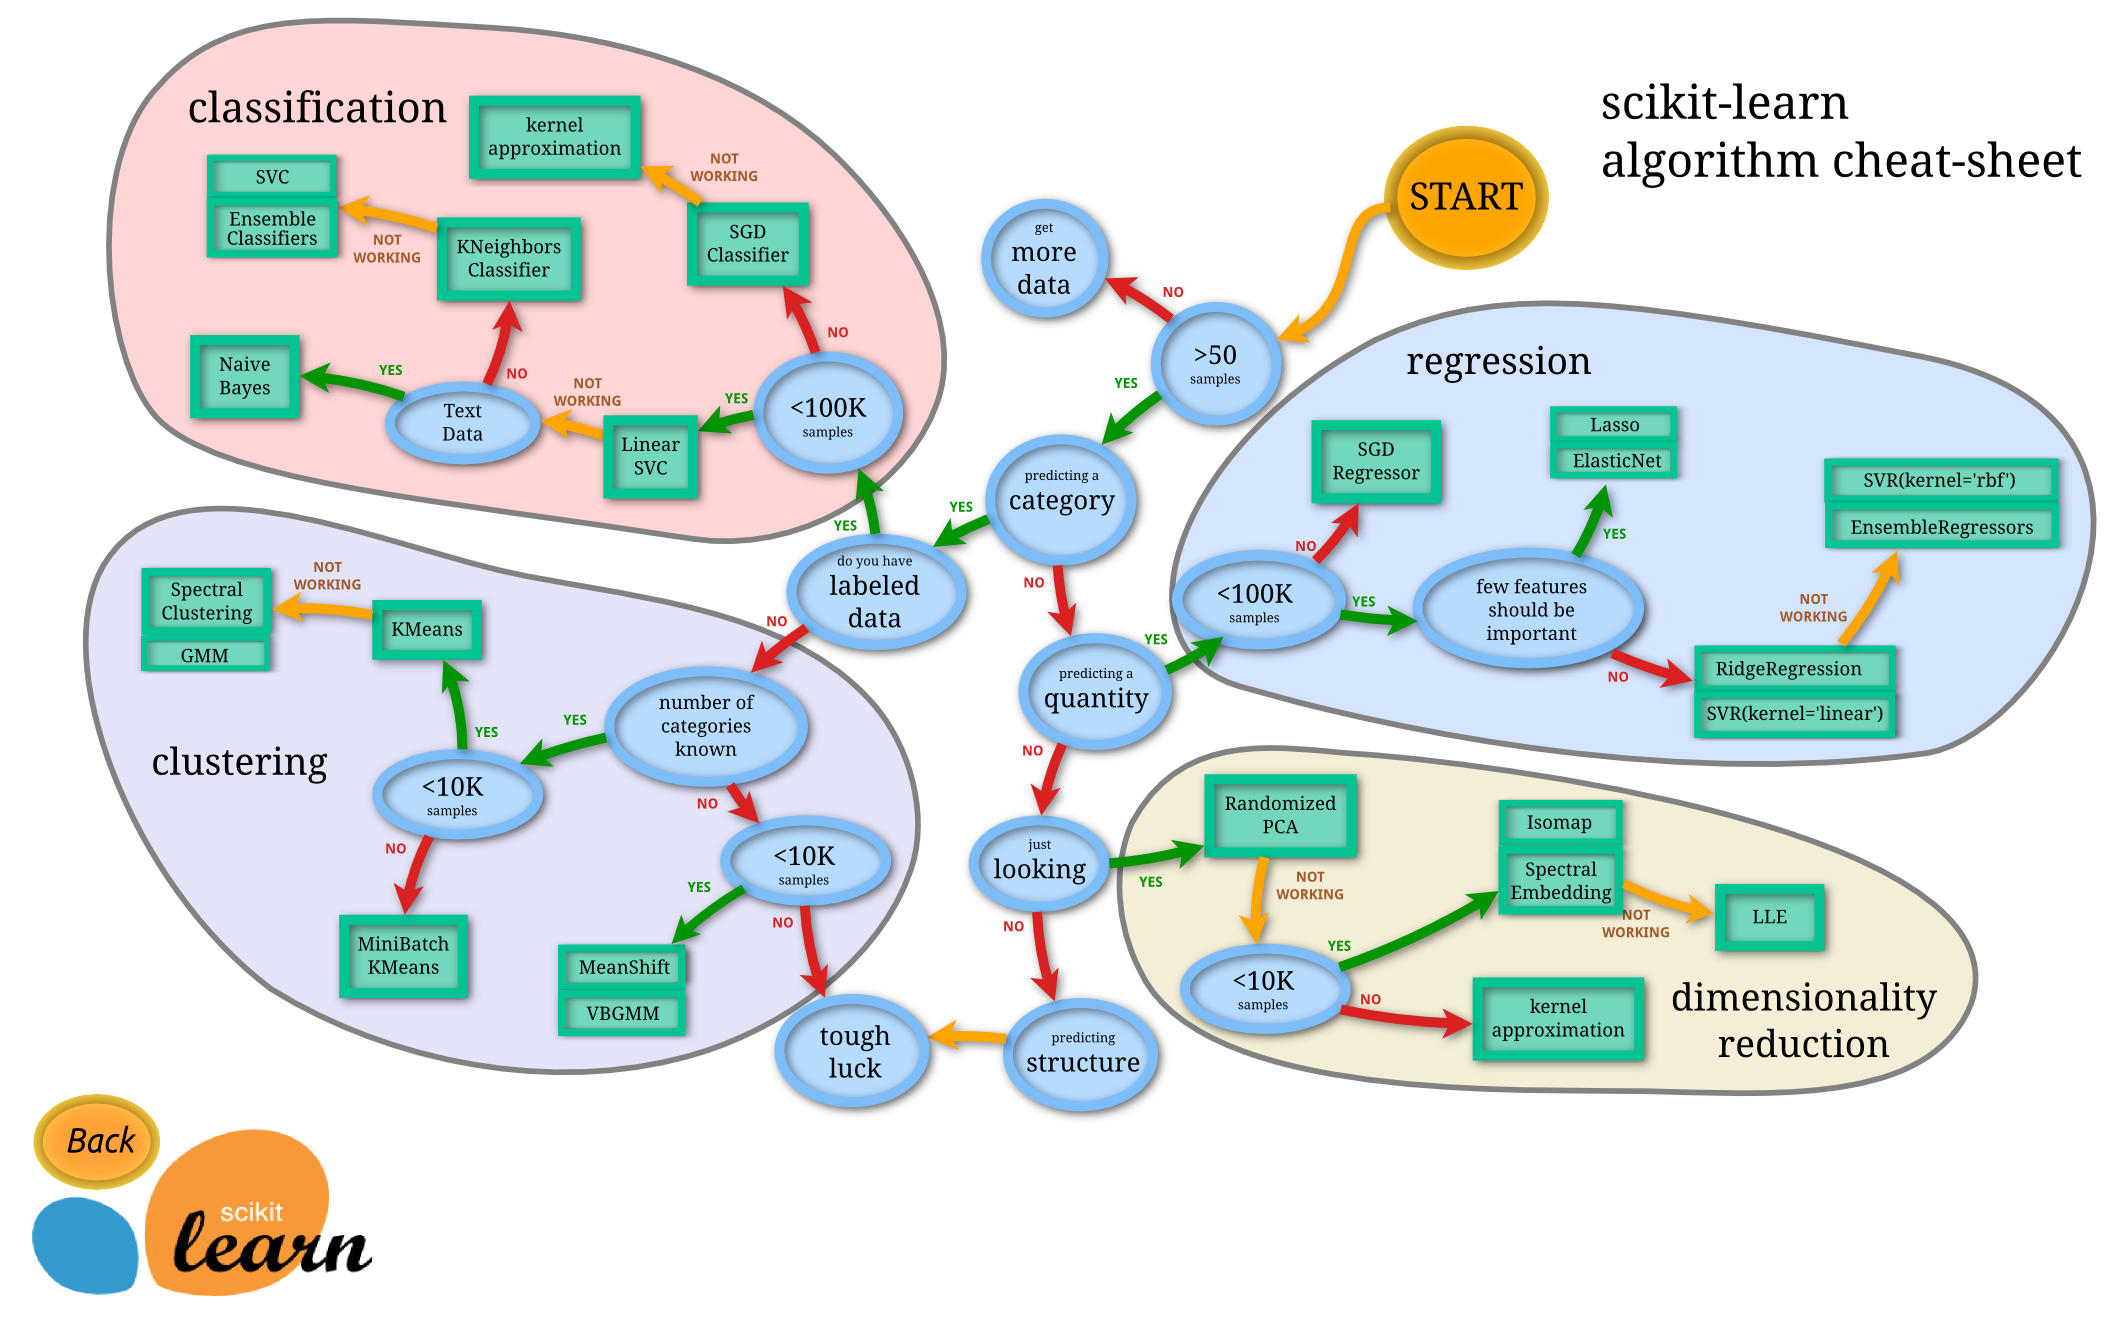

## Using random forest classifier

In [6]:
# Using Randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# Setting up random seed
np.random.seed(42)

# Getting start with data
X = hd.drop("target",axis=1)
y = hd["target"]

# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Creating model and evaluating
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Getting score
clf.score(X_test,y_test)

0.8524590163934426

## Evaluating with the `score` method

In [7]:
clf.score(X_train,y_train)

1.0

In [8]:
clf.score(X_test,y_test)

0.8524590163934426

* Works differently for classificatin and regression problems

## Evaluating with the `scoring` method

## Cross validation comes into play here....
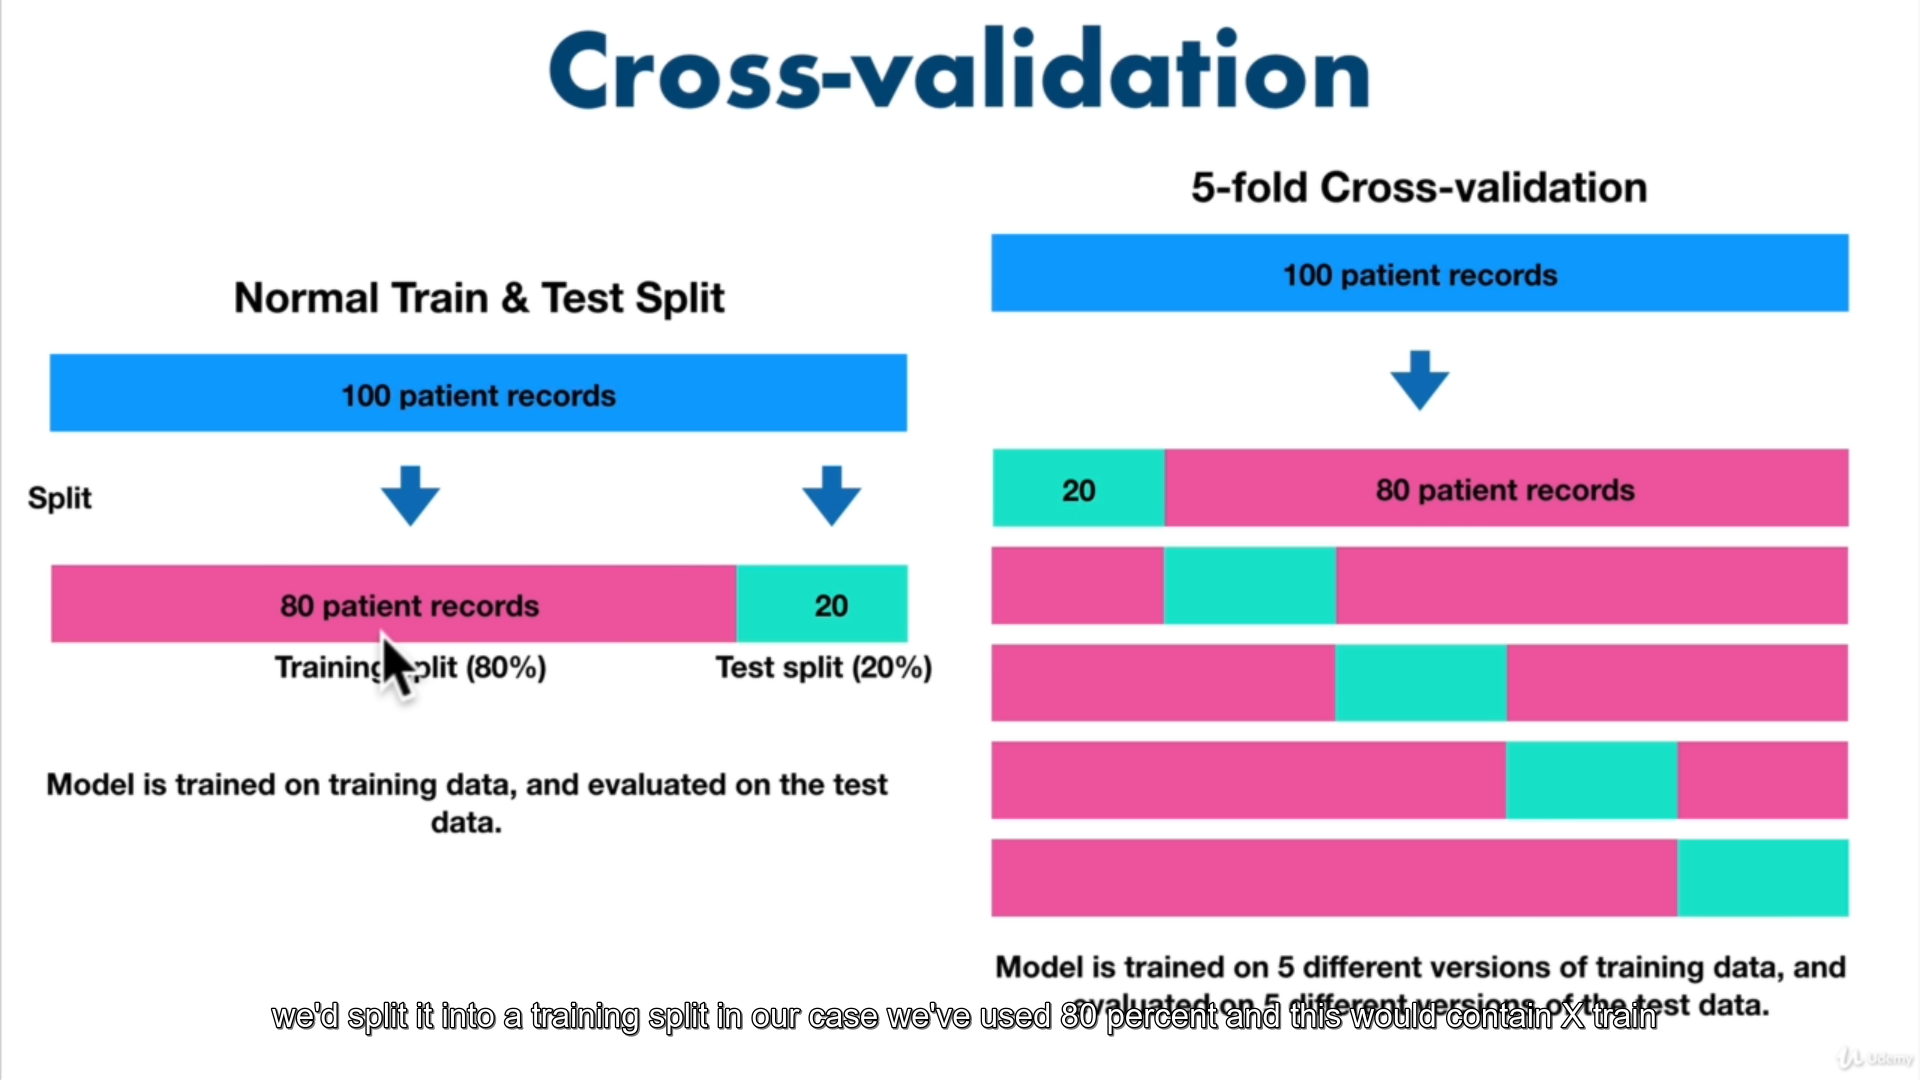

## This eliminates the chances of getting luckey test and train sets

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target",axis=1)
y = hd["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [10]:
clf.score(X_test,y_test)

0.8524590163934426

In [11]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [12]:
np.random.seed(42)
cross_val_score(clf,X,y,cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [13]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [14]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y,cv=5))

# Comparing the both
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [15]:
# Scoring parameter is by default set to none i.e set to accuracy(score())
np.random.seed(42)
cross_val_score(clf,X,y,cv=5,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [16]:
np.random.seed(42)
c_accu = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
c_accu

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [17]:
np.random.seed(42)
c_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
c_pre

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [18]:
np.random.seed(42)
c_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
c_rec

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [19]:
np.random.seed(42)
c_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
c_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

### Evaluating a classification model


* Accuracy
* Area under ROC curve
* Confusion matrix
* Classification report


### Accuracy 

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target",axis=1)
y = hd["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

cross_val_score = cross_val_score(clf,X,y,cv=5)

In [21]:
np.mean([cross_val_score])

0.8215300546448088

In [22]:
print(f"Heart disease classifier cross validation accuracy is {np.mean([cross_val_score]) * 100:.2f} %")

Heart disease classifier cross validation accuracy is 82.15 %


### Area under receiver operating characteristic curve (AUC/ROC)
* Area under curve (AUC)
* ROC curve

#### Roc is the comparison of models true postitive rate (tpr) and models false positive rate (fpr)
* True postitive = model predicts 1 when truth is 1
* Fasle positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* Fasle negative = model predicts 0 when truth is 1

In [23]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = hd.drop("target",axis=1)
y = hd["target"]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [24]:
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
y_proba = clf.predict_proba(X_test)
y_proba[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [26]:
y_proba_positive = y_proba[: ,1]
y_proba_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [27]:
# Calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_proba_positive)

# Cheak the false postive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

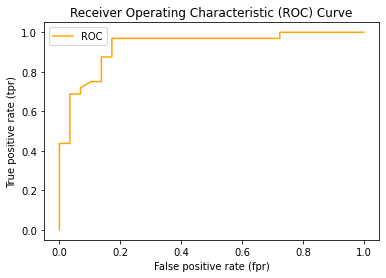

In [28]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_proba_positive) # y_true,y_preds

0.9304956896551724

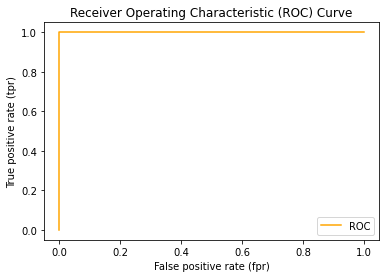

In [30]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [31]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion martix
* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [32]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [33]:
# To visualize it in pandas dataframe...
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


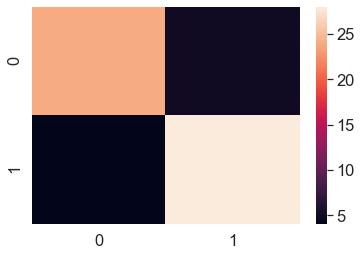

In [34]:
# Plot a confusion matrix with Seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

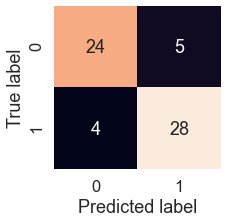

In [35]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

plot_conf_mat(conf_mat)

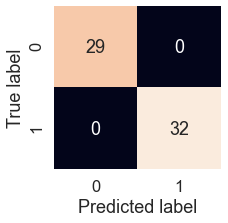

In [36]:
# Create perfect confusion matrix
perfect_conf_mat = confusion_matrix(y_test, y_test)
plot_conf_mat(perfect_conf_mat)

### Classification Report
* Precision
* Recall or Sencitivity
* F1 score
* Support

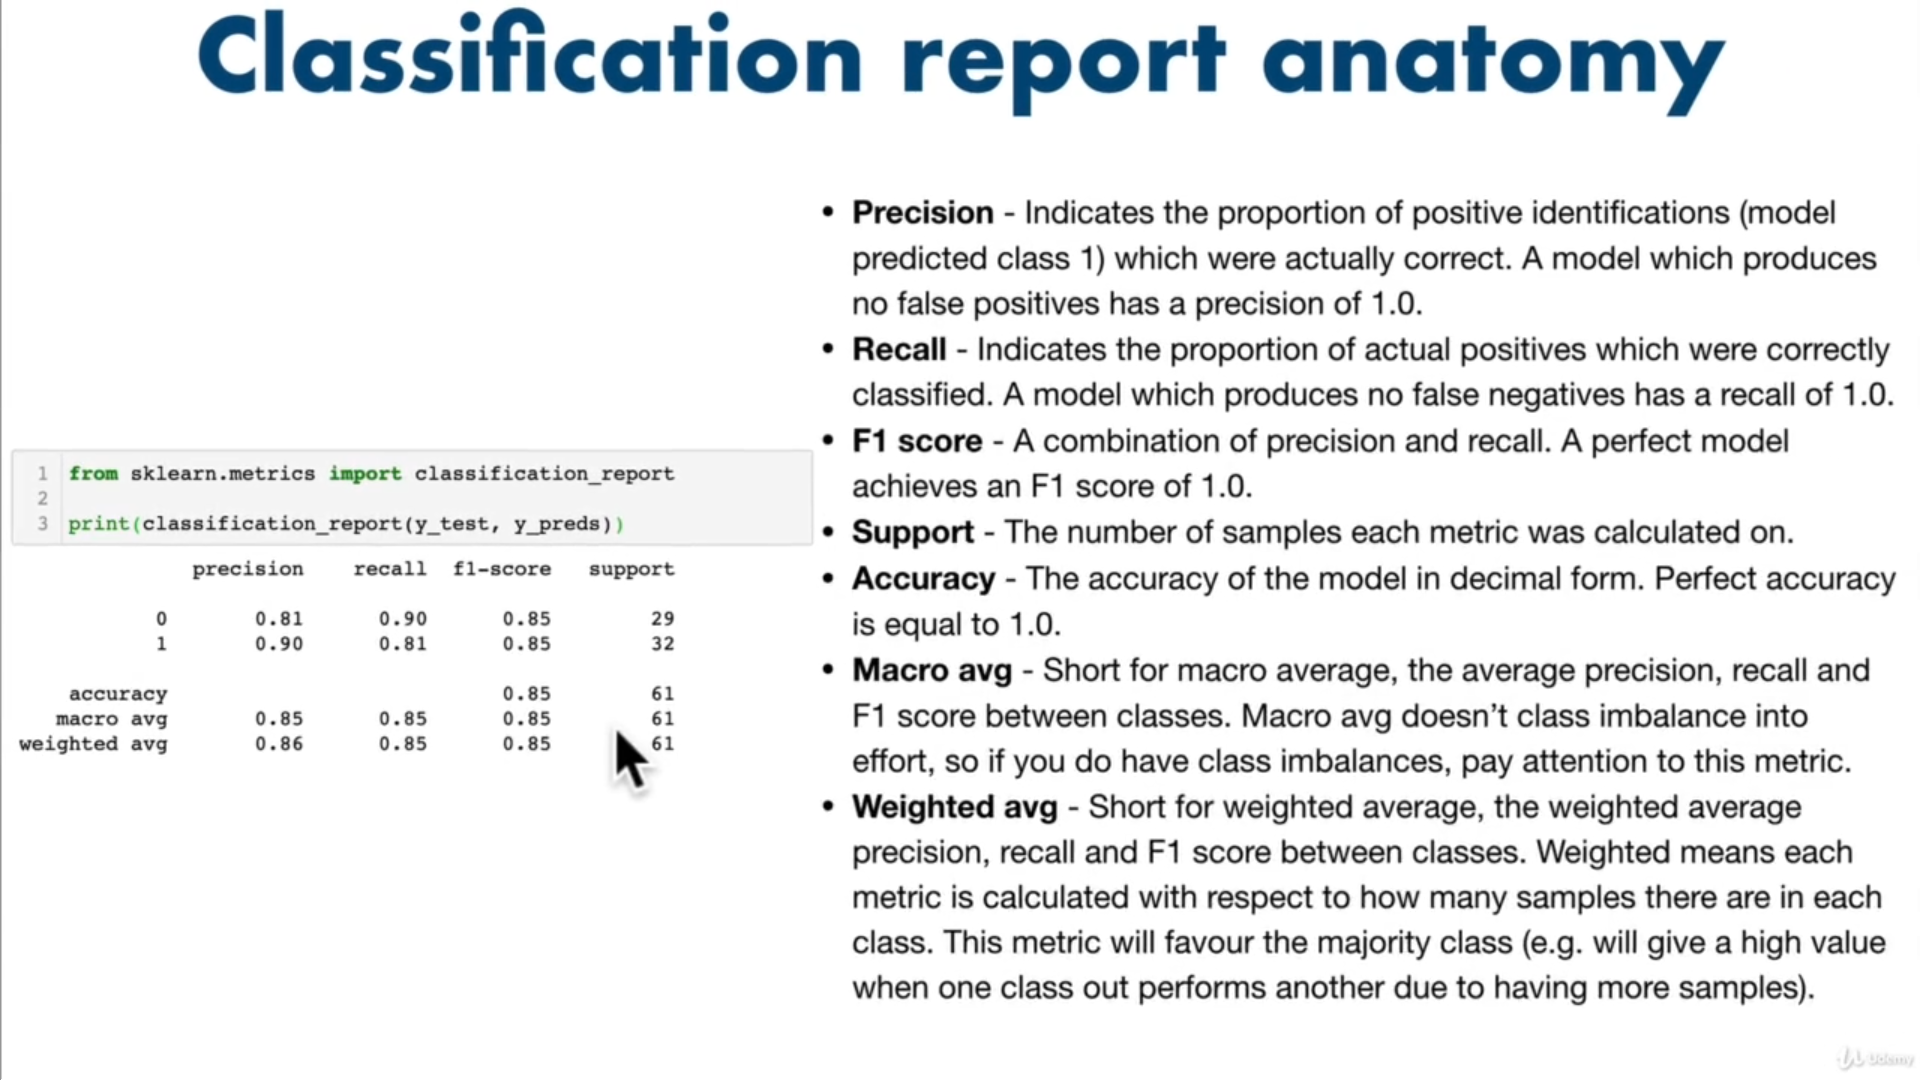

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [38]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True))

C:\Users\DINESHREDDY\Desktop\sample_project\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### Summarize for classification:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall

## Using sklearn metric module for the evaluation

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = hd.drop("target", axis=1)
y = hd["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615
